In [1]:
from ppo_eval import train_ppo
import gym
from stable_baselines3.common.evaluation import evaluate_policy
from env.custom_randomized_hopper import register_uniform

In [2]:
test_env = gym.make('CustomHopper-target-v0')
SEED = 2024
test_env.seed(SEED)
def train_test(upper, lower):
    if upper <= lower:
        return 0
    NAME = f"PPO-{upper}-{lower}"
    register_uniform(lower, upper, NAME+'-v0')
    train_env = gym.make(NAME+'-v0')
    train_env.seed(SEED)
    model = train_ppo(train_env, 'outputs/hpppo3/'+NAME+'.mdl', total_timesteps=100_000, seed=SEED)
    mean_reward, _ = evaluate_policy(model, test_env, 500)
    train_env.close()
    return mean_reward

In [3]:
print('lower', ',', 'upper', ',', 'reward')
for lower in range(0,2):
    for upper in range(2,8):
        reward = train_test(upper, lower)
        print(lower, ',', upper, ',', reward)

lower , upper , reward


/home/tanguy/Documents/rl_project/.conda/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


0 , 2 , 607.4439175126553
0 , 3 , 714.46647531569
0 , 4 , 504.75279491591454
0 , 5 , 1008.694168118
0 , 6 , 738.4618785221577
0 , 7 , 634.2950039770603
1 , 2 , 678.7542459352017
1 , 3 , 597.4115056524276
1 , 4 , 530.4205758154392
1 , 5 , 624.470080632925
1 , 6 , 795.7478674685955
1 , 7 , 524.7929969906806


In [10]:
import pandas as pd
results = pd.read_csv("outputs/hpppo3/results.csv")
import seaborn as sns
results.columns

Index(['lower', 'upper', 'reward'], dtype='object')

<Axes: xlabel='upper', ylabel='lower'>

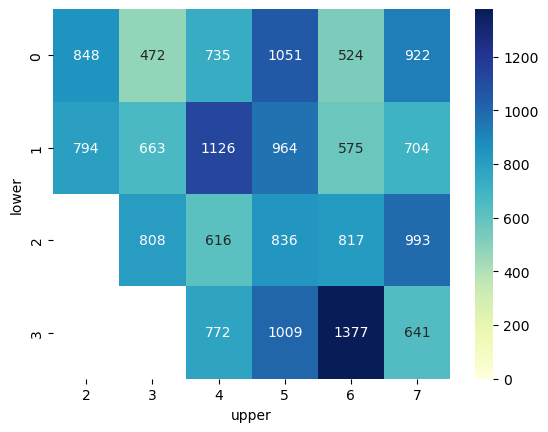

In [11]:
sns.heatmap(results.pivot(index='lower', columns='upper', values='reward'), cmap='YlGnBu', annot=True, fmt='.0f', vmin=0)